# Lorenz Attractor
<br>
A classic of chaos theory
Also ... 3D

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Dynamical System

In [2]:
def Lorenz(state,t):
    # 1 - unpack the state vector
    x = state[0]
    y = state[1]
    z = state[2]

    # 2 - Unpack parameter vector or assign values directly
    sigma = 10.0
    rho = 28.0
    beta = 8.0/3.0

    # 3 - compute state derivatives
    xd = sigma * (y-x)
    yd = (rho-z)*x - y
    zd = x*y - beta*z

    # 4- return the state derivatives
    return [xd, yd, zd]

## Simulation

In [3]:
state0 = [2.0, 3.0, 4.0]
t = np.arange(0.0, 30.0, 0.01)

state = odeint(Lorenz, state0, t)

## 3D Display
<br>
A bit more exciting than a mere plot of the individual components against time
And more exciting than a 2D phase diagram...
BTW Poincare theorem does not apply in 3D and more ...
hence chaos

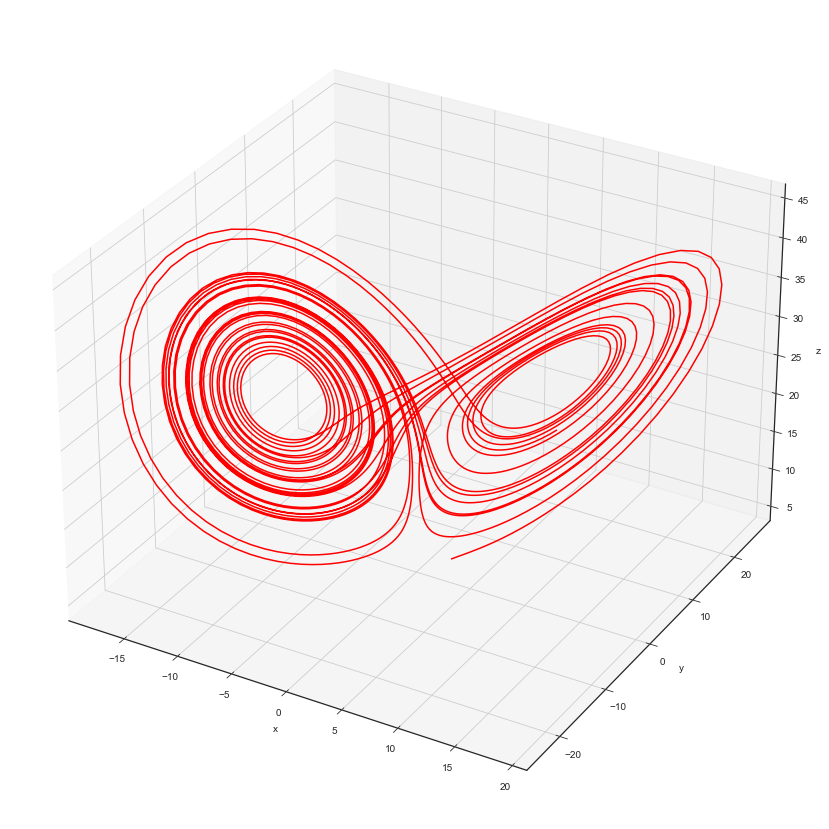

In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,15))
ax = fig.gca(projection='3d')
ax.plot(state[:,0],state[:,1],state[:,2],c='r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


axes = plt.gca()
#axes.set_xlim([0,20])
#axes.set_ylim([0,20])
#axes.set_zlim([0,30])
plt.show()

## Let's Do Something a Bit More Fancy
<br>
We are going to observe how two trajectories with close initial conditions diverge with time...<br>
And compute the distance between trajectories while we are at it

In [5]:
t = np.arange(0.0, 30.0, 0.01)

# original initial conditions
state1_0 = [2.0, 3.0, 4.0]
state1 = odeint(Lorenz, state1_0, t)

# rerun with very small change in initial conditions
delta = 0.0001
state2_0 = [2.0+delta, 3.0, 4.0]
state2 = odeint(Lorenz, state2_0, t)


### First Plot : we plot the two trajectories together

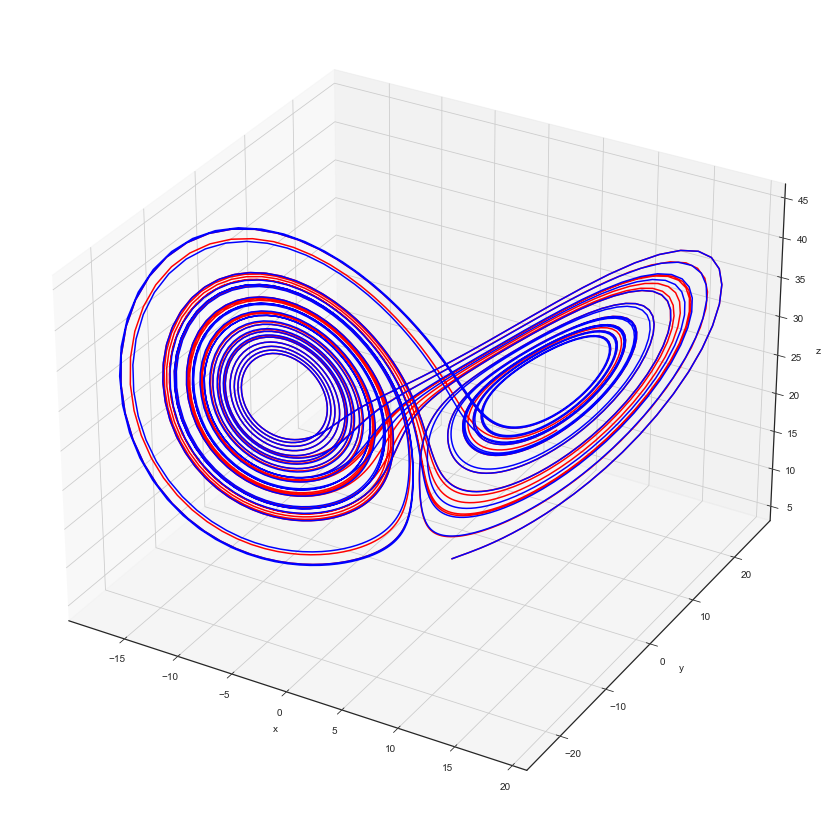

In [6]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,15))
ax = fig.gca(projection='3d')
pb1= ax.plot(state1[:,0],state1[:,1],state1[:,2],c='r')
pb1= ax.plot(state2[:,0],state2[:,1],state2[:,2],c='b')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


axes = plt.gca()
plt.show()

## Problem: we have no idea where the particles are wrt time
<br>
trajectories seem to remain close 
Indeed they converge to the Lorenz Attractor

### Let's do a bit better ( in 2D)
we are going to overlay the position of particles at certain times over the trajectories

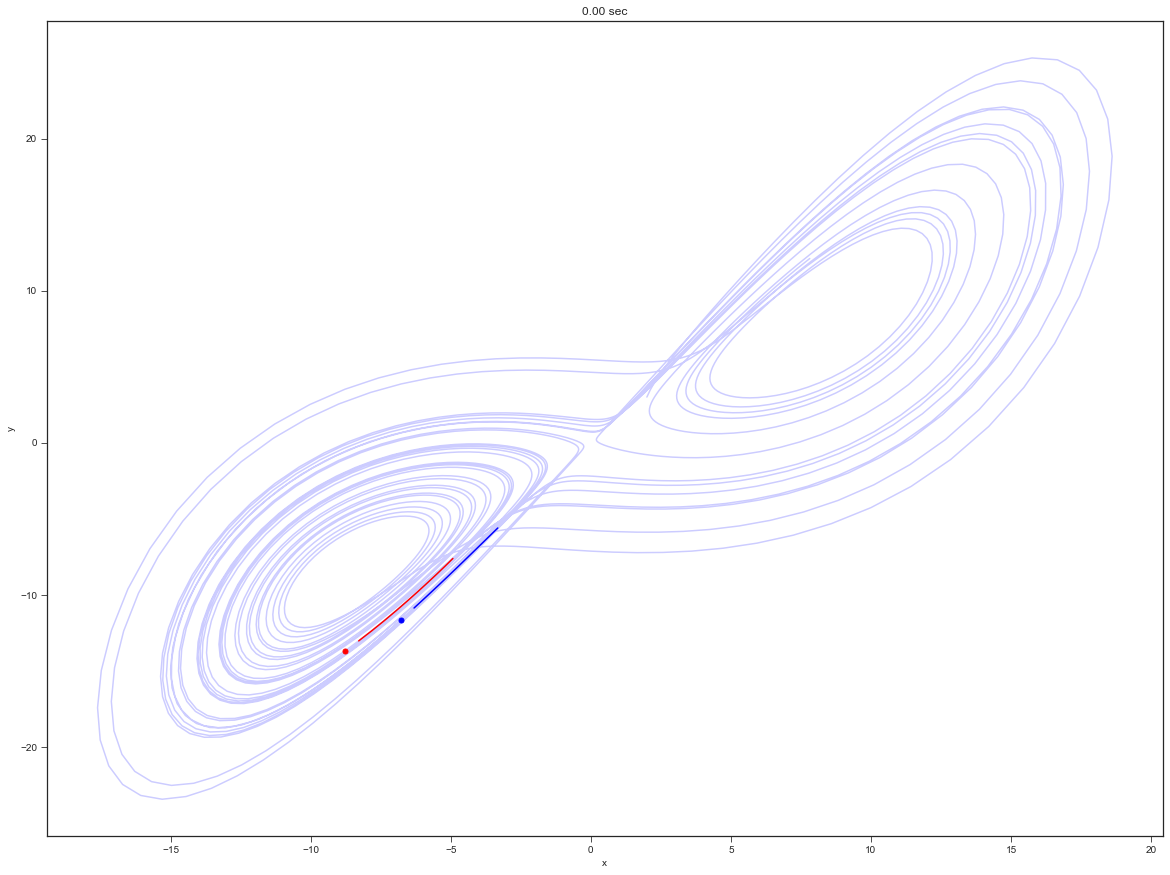

In [7]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,15))
pb = plt.plot(state1[:,0],state1[:,1],'b-',alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')
p, = plt.plot(state1[2000:2010,0],state1[2000:2010,1],'b-')
pp, = plt.plot(state1[2010,0],state1[2010,1],'b.',markersize=10)
p2, = plt.plot(state2[2000:2010,0],state2[2000:2010,1],'r-')
pp2, = plt.plot(state2[2010,0],state2[2010,1],'r.',markersize=10)
tt = plt.title("%4.2f sec" % 0.00)
# at time t=20 (index = 2000)


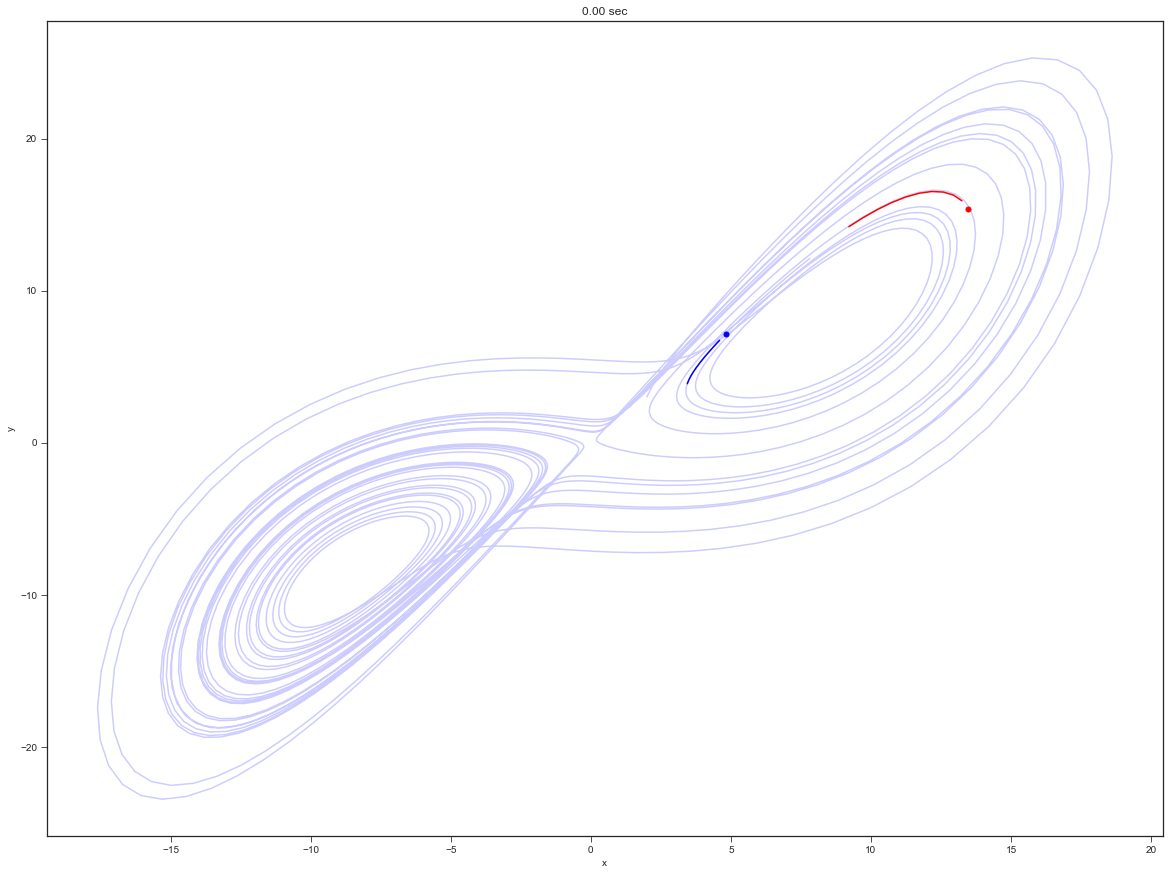

In [8]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,15))
pb = plt.plot(state1[:,0],state1[:,1],'b-',alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')
p, = plt.plot(state1[2980:2990,0],state1[2980:2990,1],'b-')
pp, = plt.plot(state1[2990,0],state1[2990,1],'b.',markersize=10)
p2, = plt.plot(state2[2980:2990,0],state2[2980:2990,1],'r-')
pp2, = plt.plot(state2[2990,0],state2[2990,1],'r.',markersize=10)
tt = plt.title("%4.2f sec" % 0.00)
# at time t=29.9 (index = 2990)

## Estimating the Distance between Particles

### Let's start with a given time

In [13]:
i = 1939          # the two simulations really diverge here!
s1 = state1[i,:]
s2 = state2[i,:]
d12 = np.linalg.norm(s1-s2) # distance
print ("Distance = {} for a {} different in initial condition @ time {}s".format(d12, delta,i/100))

distance = 32.75725254940175 for a 0.0001 different in initial condition @ time 19.39


### Now let's find the max over the simulation interval

In [33]:
# Where does the largest distance occur at ???

# the simple C-like version 
distances = [] # 
for i in range(len(state1)):
    s1 = state1[i,:]
    s2 = state2[i,:]
    distances.append(np.linalg.norm(s1-s2))

result_string = \
    f"Maximum distance is {np.amax(distances)}.\n"\
    f"It occurs at index {np.argmax(distances)},"\
    f"at time {np.argmax(distances)/100}."
print(result_string)



# more pythonic (comprehension)
distances = [np.linalg.norm(state1[i,:]-state2[i,:]) for i in range(len(state1))]
                                                                   
result_string2 = \
    f"Maximum distance is {np.amax(distances)}.\n"\
    f"It occurs at index {np.argmax(distances)},"\
    f"at time {np.argmax(distances)/100}."
print('\n---------------------------------------')
print('Second Method')
print(result_string2)



# It remains a fairly dirty way to go through the arrays..
# Better to zip state1 and state2 and iterate over it
trajectories = zip(state1,state2)
# print(list(trajectories)[0:10]) this will give you an insight into the data structure that is created

distances = [np.linalg.norm(point[0]-point[1]) for point in trajectories]
result_string3 = \
    f"Maximum distance is {np.amax(distances)}.\n"\
    f"It occurs at index {np.argmax(distances)},"\
    f"at time {np.argmax(distances)/100}."
print('\n---------------------------------------')
print('Third Method')
print(result_string3)

Maximum distance is 47.5808865645527.
It occurs at index 2623,at time 26.23.

---------------------------------------
Second Method
Maximum distance is 47.5808865645527.
It occurs at index 2623,at time 26.23.

---------------------------------------
Third Method
Maximum distance is 47.5808865645527.
It occurs at index 2623,at time 26.23.


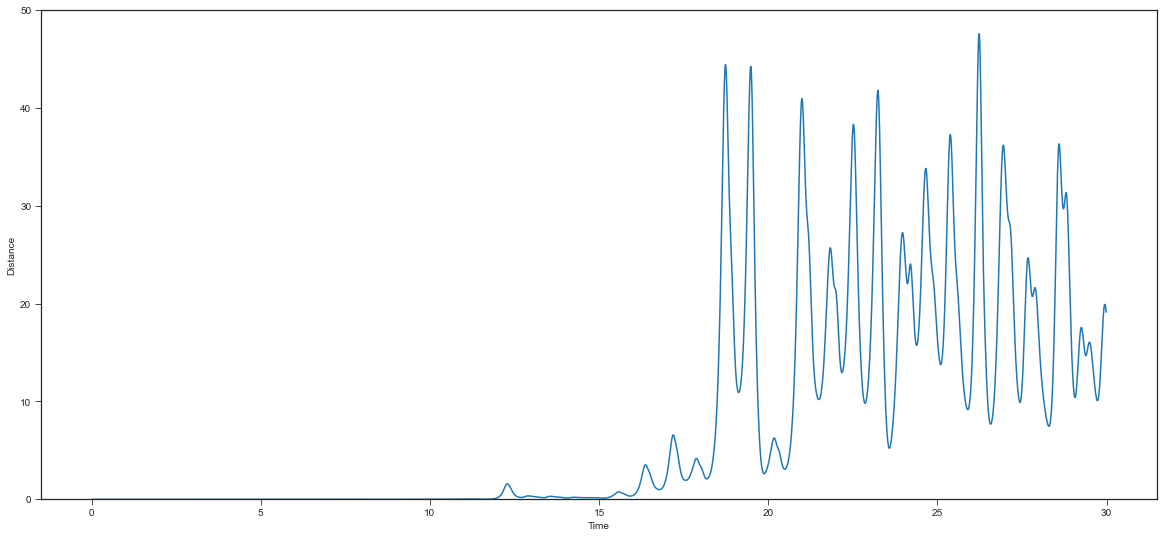

In [34]:
# Let's plot the distance 
# (you can make it prettier with the right matplotlib options)

plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,9))

plt.plot(t,distances)
plt.ylim([0,50])
plt.xlabel('Time')
plt.ylabel('Distance')
plt.show()

Pretty Funky...
I love chaos